In [1]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris() #打開來會看到函式庫set好的資料
#這裡用pandas做資料處理,並加上欄位名稱
df = pd.DataFrame(iris["data"],
                  columns=iris["feature_names"])
#加上一欄"ans",把target欄位的值加進來
df["ans"] = iris["target"]
#存成csv,預設會有index,這邊不要
df.to_csv("iris.csv", encoding="utf-8", index=False)
#jupter支援比較漂亮的用法,要寫在最後一行,就會直接印出 >> 本地端還是要用print
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),ans
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [2]:
# 開始丟到sklearn前, 把所有東西轉換成numpy array(好習慣)
import numpy as np
from sklearn.model_selection import train_test_split
# x: 輸入 y: 輸出
y = df["ans"]
y = np.array(y)
#這裡已經知道是iris["data"] , 但是用drop示範一次如何切資料 , axis參數:0是列,1是行
#所有的始丟到sklearn前, 把所有東西轉換成numpy array(好習慣)
import numpy as np
from sklearn.model_selection import train_test_split
# x: 輸入 y: 輸出
y = df["ans"]
y = np.array(y)
#這裡已經知道是iris["data"] , 但是用drop示範一次如何切資料 , axis參數:0是列,1是行
#所有的API做資料處理,都是產生新表格,原資料不會異動
x = df.drop(["ans"], axis=1) #axis沒有寫的話,預設是0
x = np.array(x)
#機器學習第一步：把資料分成兩份 >> 訓練資料&驗證資料 [大部分抓9:1] ,test_size參數是比例的意思
# 90% x, 10% x, 90% y, 10% y
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)
##使用train_test_split來做資料切割,會random切資料,但資料的index相對位置不會變動
# train_test_split([1, 2, 3, 4], 
#                  ["a", "b", "c", "d"],
#                  [101, 102, 103, 104],
#                  test_size=0.25)

In [17]:
#使用決策樹演算法,並且用分類
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=3) #用max_depth做前剪枝,這裡設定3層就可以達到100%,這裡的層數要看決策樹的狀況做分辨&調整
#前剪枝就算準確率下降也要做,可以提高穩定性(降低誤差值) >>> 不能過度學習極端的案例 ex:花有特異種,超過一般規格,卻被模型學習進去
clf.fit(x_train, y_train) #把資料餵進去,x_train > 植物的數值 , y_train > 3種分類的結果

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

[Text(279.0, 489.24, 'petal length (cm) <= 2.45\ngini = 0.667\nsamples = 135\nvalue = [44, 46, 45]\nclass = versicolor'),
 Text(236.07692307692307, 380.52000000000004, 'gini = 0.0\nsamples = 44\nvalue = [44, 0, 0]\nclass = setosa'),
 Text(321.9230769230769, 380.52000000000004, 'petal width (cm) <= 1.75\ngini = 0.5\nsamples = 91\nvalue = [0, 46, 45]\nclass = versicolor'),
 Text(171.69230769230768, 271.8, 'petal length (cm) <= 4.95\ngini = 0.15\nsamples = 49\nvalue = [0, 45, 4]\nclass = versicolor'),
 Text(85.84615384615384, 163.08000000000004, 'petal width (cm) <= 1.65\ngini = 0.044\nsamples = 44\nvalue = [0, 43, 1]\nclass = versicolor'),
 Text(42.92307692307692, 54.360000000000014, 'gini = 0.0\nsamples = 43\nvalue = [0, 43, 0]\nclass = versicolor'),
 Text(128.76923076923077, 54.360000000000014, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = virginica'),
 Text(257.53846153846155, 163.08000000000004, 'petal width (cm) <= 1.55\ngini = 0.48\nsamples = 5\nvalue = [0, 2, 3]\nclass = vi

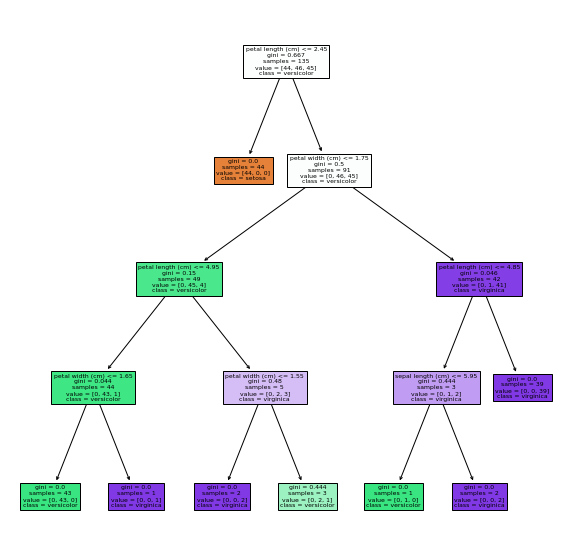

In [15]:
#這裡把決策樹畫出來
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(10, 10)) #用原始函式庫把畫布調大 , figure是圖
#用plot_tree畫樹 , filled是上色 ,其他是把欄位填進去
plot_tree(clf, 
          feature_names=iris["feature_names"],
          class_names=iris["target_names"],
          filled=True)

In [16]:
#驗證準確率
from sklearn.metrics import accuracy_score
pre = clf.predict(x_test) #把x_test的結果做驗證
accuracy_score(pre, y_test) #和y_test做比對,拿到準確率

1.0